<a href="https://colab.research.google.com/github/myllanes/Introduction-to-Deep-Learning/blob/main/HW1_1ab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using device: cpu
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/20, Loss: 2.3041, Train Accuracy: 10.00%, Val Accuracy: 10.00%
Epoch 2/20, Loss: 2.3022, Train Accuracy: 10.04%, Val Accuracy: 10.01%
Epoch 3/20, Loss: 2.3006, Train Accuracy: 11.99%, Val Accuracy: 14.21%
Epoch 4/20, Loss: 2.2981, Train Accuracy: 15.60%, Val Accuracy: 16.73%
Epoch 5/20, Loss: 2.2929, Train Accuracy: 18.17%, Val Accuracy: 18.81%
Epoch 6/20, Loss: 2.2797, Train Accuracy: 18.78%, Val Accuracy: 18.26%
Epoch 7/20, Loss: 2.2340, Train Accuracy: 17.44%, Val Accuracy: 17.81%
Epoch 8/20, Loss: 2.1290, Train Accuracy: 17.75%, Val Accuracy: 19.57%
Epoch 9/20, Loss: 2.0435, Train Accuracy: 21.72%, Val Accuracy: 22.07%
Epoch 10/20, Loss: 1.9884, Train Accuracy: 23.97%, Val Accuracy: 25.68%
Epoch 11/20, Loss: 1.9264, Train Accuracy: 26.11%, Val Accuracy: 27.49%
Epoch 12/20, Loss: 1.8686, Train Accuracy: 28.31%, Val Accuracy: 30.12%
Epoch 13/20, Loss: 1.8242, Train Accuracy: 30.65%, 

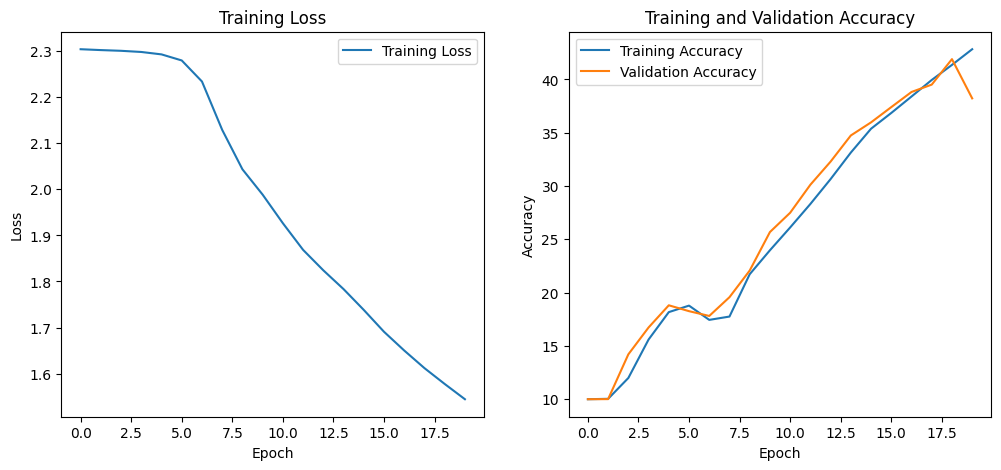

Precision: 0.3856
Recall: 0.3822
F1 Score: 0.3640
Confusion Matrix:
[[546  22  94  16  32  28  28  50 152  32]
 [ 61 395  16  18  34  41  69  59  98 209]
 [105   3 462  41  27 147 169  32   9   5]
 [ 52   1 151  52  13 456 153  92  11  19]
 [ 58   0 423  34  41  92 290  42  12   8]
 [ 33   0 137  37   4 537 164  49  19  20]
 [ 13   3 257  19  25 125 488  62   0   8]
 [ 38   7  74  66  20 220 229 318   7  21]
 [237  43  42  24  12  53  10  23 499  57]
 [ 51 101  13  22  16  54  32 152  75 484]]


In [14]:
#Michael Yllanes
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)

# Colab
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

#labels for CIFAR-10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        #self.fc1 = nn.Linear(32 * 32 * 3, 512)  # Input layer
        #self.fc2 = nn.Linear(512, 256)          # First hidden layer
        #self.fc3 = nn.Linear(256, 128)          # Second hidden layer
        #self.fc4 = nn.Linear(128, 10)           # Third hidden layer
        #self.relu = nn.ReLU()

        self.fc1 = nn.Linear(32 * 32 * 3, 512)  # Input layer =
        self.fc2 = nn.Linear(512, 256)          # First hidden layer
        self.fc3 = nn.Linear(256, 128)          # Second hidden layer
        self.fc4 = nn.Linear(128, 64)           # Third hidden layer
        self.fc5 = nn.Linear(64, 32)            # Fourth hidden layer
        self.fc6 = nn.Linear(32, 10)            # Fifth hidden layer
        self.relu = nn.ReLU()

    def forward(self, x):
        #x = x.view(x.size(0), -1)  # Flatten the input
        #x = self.relu(self.fc1(x))
        #x = self.relu(self.fc2(x))
        #x = self.relu(self.fc3(x))
        #x = self.fc4(x)

        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        x = self.fc6(x)

        return x

model = MLP().to(device)  # Model

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Lists to store metrics
train_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100. * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation
    model.eval()
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_accuracy = 100. * val_correct / val_total
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Accuracy: {val_accuracy:.2f}%")

# Plot results
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

#Evaluation the result
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

precision = precision_score(all_labels, all_preds, average='macro')
recall = recall_score(all_labels, all_preds, average='macro')
f1 = f1_score(all_labels, all_preds, average='macro')
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Save the model
torch.save(model.state_dict(), 'cifar10_mlp.pth')

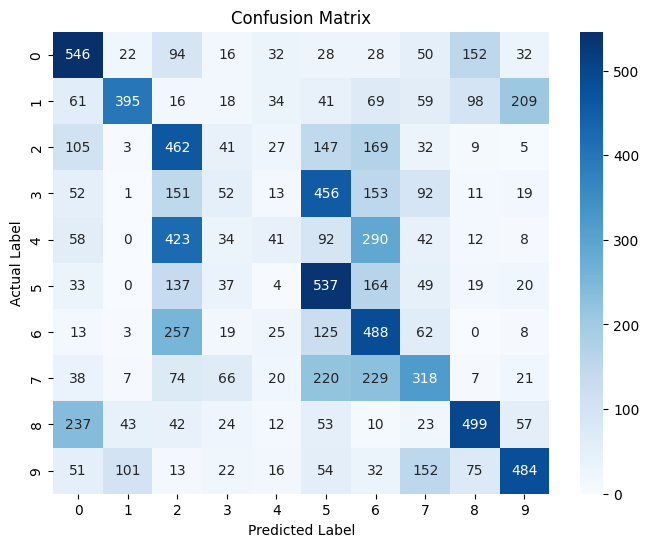

In [15]:
#Confusion matrix using a heatmap
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# Basic heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()